In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# produce two panel figure with Einstein model noise in left panel and the einstein trajectories in the right panel

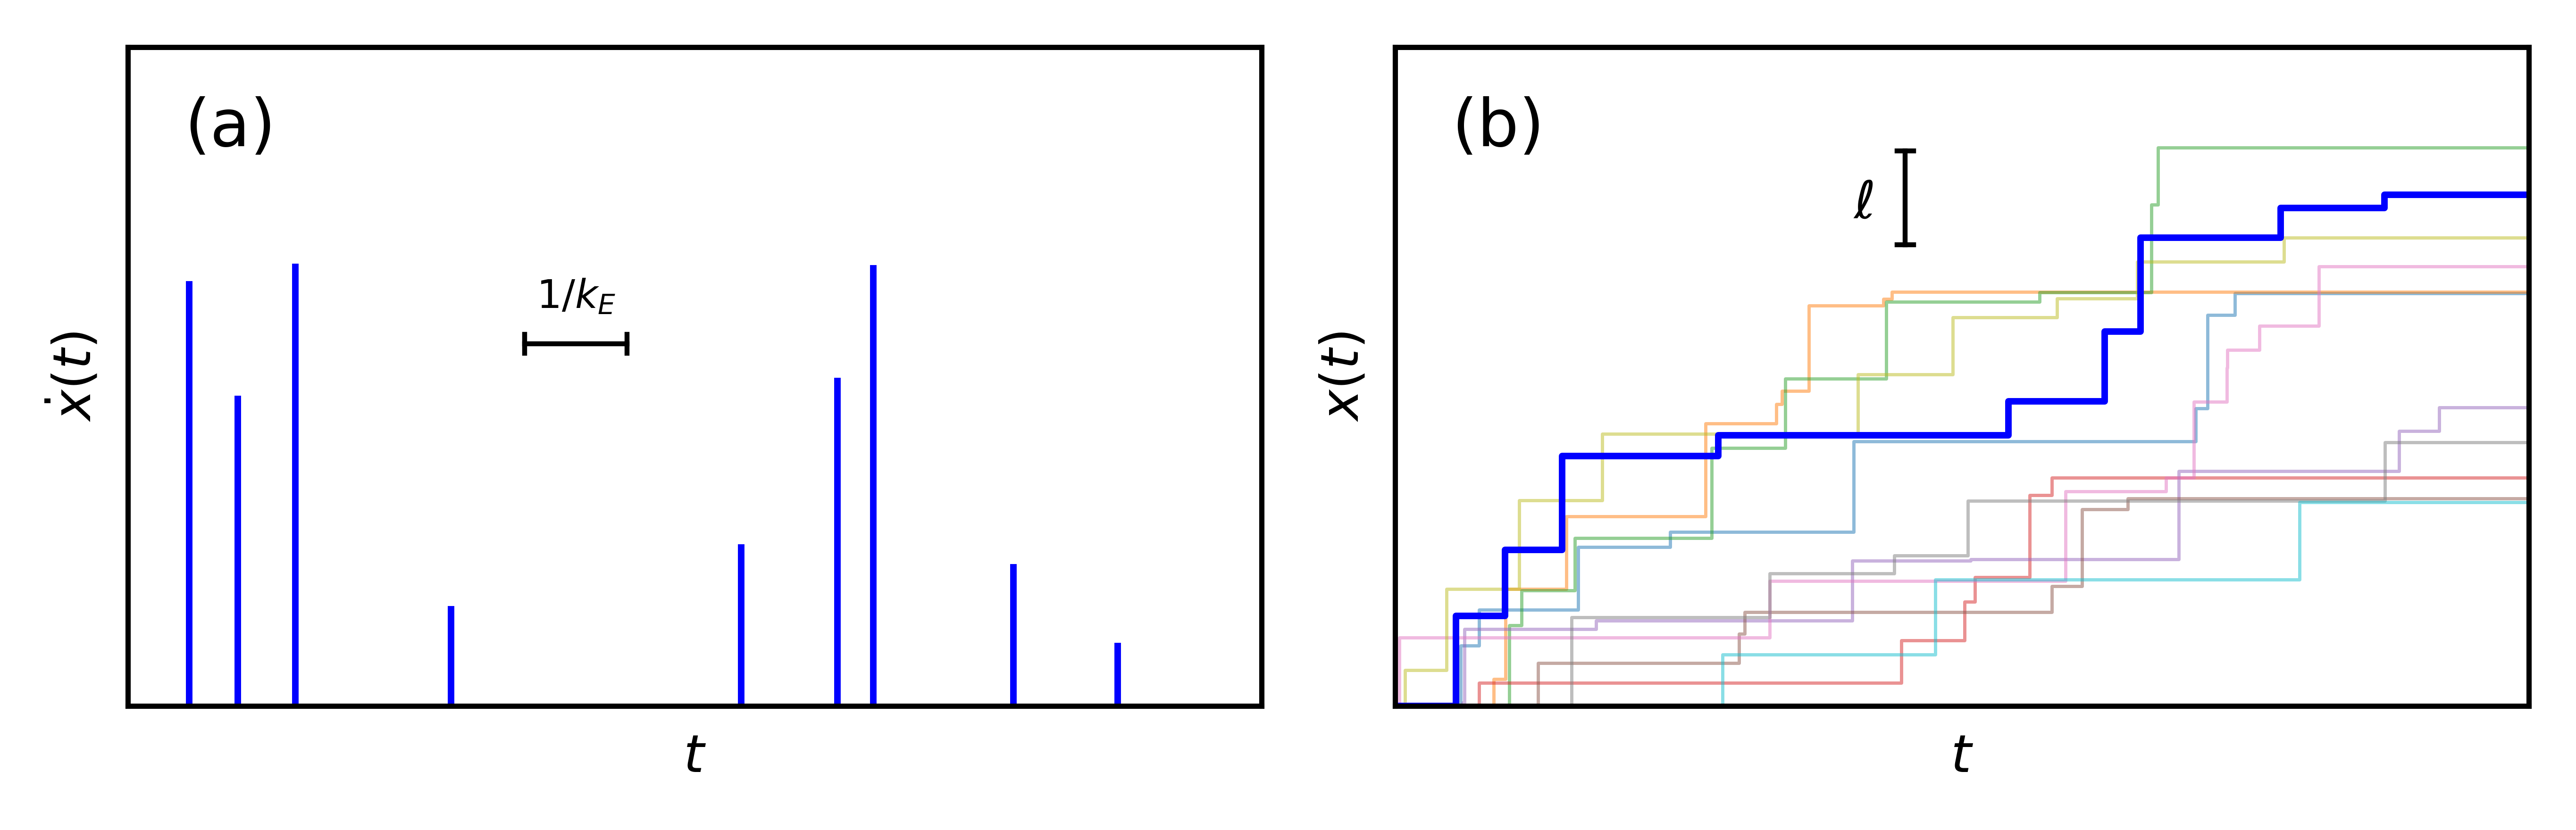

In [156]:
xsmol = 4
smol = 6 # the font sizes
med = 8
lar = 10
plt.rc('font',size=med)
plt.rc('axes',titlesize=med)
plt.rc('axes',labelsize=med)
plt.rc('xtick',labelsize=xsmol)
plt.rc('ytick',labelsize=xsmol)
plt.rc('legend',fontsize=med)
plt.rc('figure',titlesize=med)


# initialize the figure
h = 1.8 # height
w = 5.5 # width

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(w,h),dpi=1000,tight_layout=True)

ax1.set_xlabel(r"$t$")
ax1.set_ylabel(r"$\dot{x}(t)$")
ax2.set_xlabel(r"$t$")
ax2.set_ylabel(r"$x(t)$")

tmin=0
tmax=10
ax1.set_xlim(tmin,tmax)
ax2.set_xlim(tmin,tmax)
ymax = 1.5
ymin = 0 
ax1.set_ylim(ymin,ymax)
ax2.set_ylim(0,7)

# plot spikes in left panel..
i = 24
np.random.seed(i) # set the seed
n = 9 # number of spikes to include..
lvals = np.random.random(n)
mean = n/tmax
tvals = np.random.exponential(1/mean,size=n).cumsum()
for l,t in zip(lvals,tvals):
    ax1.axvline(t,ymin=0,ymax=l/ymax,lw=1,color='blue')


t = [0]+[tvals[i//2] for i in range(2*len(tvals)-1)] + [tvals[-1],tmax]  
l = [0,0] + [lvals.cumsum()[i//2] for i in range(2*len(lvals))] 
ax2.plot(t,l,lw=1,color='blue')

# add in the other panel b trajectories too...
for i in range(30,40):
    np.random.seed(i)
    lvals = np.random.random(n)
    tvals = np.random.exponential(1/mean,size=n).cumsum()
    t = [0]+[tvals[i//2] for i in range(2*len(tvals)-1)] + [tvals[-1],tmax]  
    l = [0,0] + [lvals.cumsum()[i//2] for i in range(2*len(lvals))] 
    ax2.plot(t,l,lw=0.5,alpha=0.5,zorder=-1)



fx = 0.05
fy = 0.85
ax1.text(fx*tmax,fy*ymax,'(a)',fontsize=lar)
ax2.text(fx*tmax,fy*7,'(b)',fontsize=lar)

# turn off axis ticks...
ax1.axes.yaxis.set_ticklabels([])
ax1.set_yticks([])
ax1.axes.xaxis.set_ticklabels([])
ax1.set_xticks([])
ax2.axes.yaxis.set_ticklabels([])
ax2.set_yticks([])
ax2.axes.xaxis.set_ticklabels([])
ax2.set_xticks([])


# add in keys on the left panel..
dy = ymax/70
dx = mean
x,y = 3.5,0.55*ymax
keylw = 0.75
ax1.plot([x,x+dx],[y,y],color='black',lw=keylw)
ax1.plot([x,x],[y-dy,y+dy],color='black',lw=keylw)
ax1.plot([x+dx,x+dx],[y-dy,y+dy],color='black',lw=keylw)
ax1.text(x+dx/2,y+5*dy,r"$1/k_E$",ha='center',va='center',fontsize=smol)

ymax=7
dy = 1
dx = ymax/95
x,y = 4.5,0.7*ymax
ax2.plot([x,x],[y,y+dy],color='black',lw=keylw)
ax2.plot([x-dx,x+dx],[y,y],color='black',lw=keylw)
ax2.plot([x-dx,x+dx],[y+dy,y+dy],color='black',lw=keylw)
ax2.text(x-5*dx,y+dy/2-dy/15,r"$\ell$",ha='center',va='center',fontsize=med)


# that's it. 
plt.savefig('einsteinConcept.pdf',dpi=1000)

# now do the same for lisle... telegraph noise in left panel, trajs in right

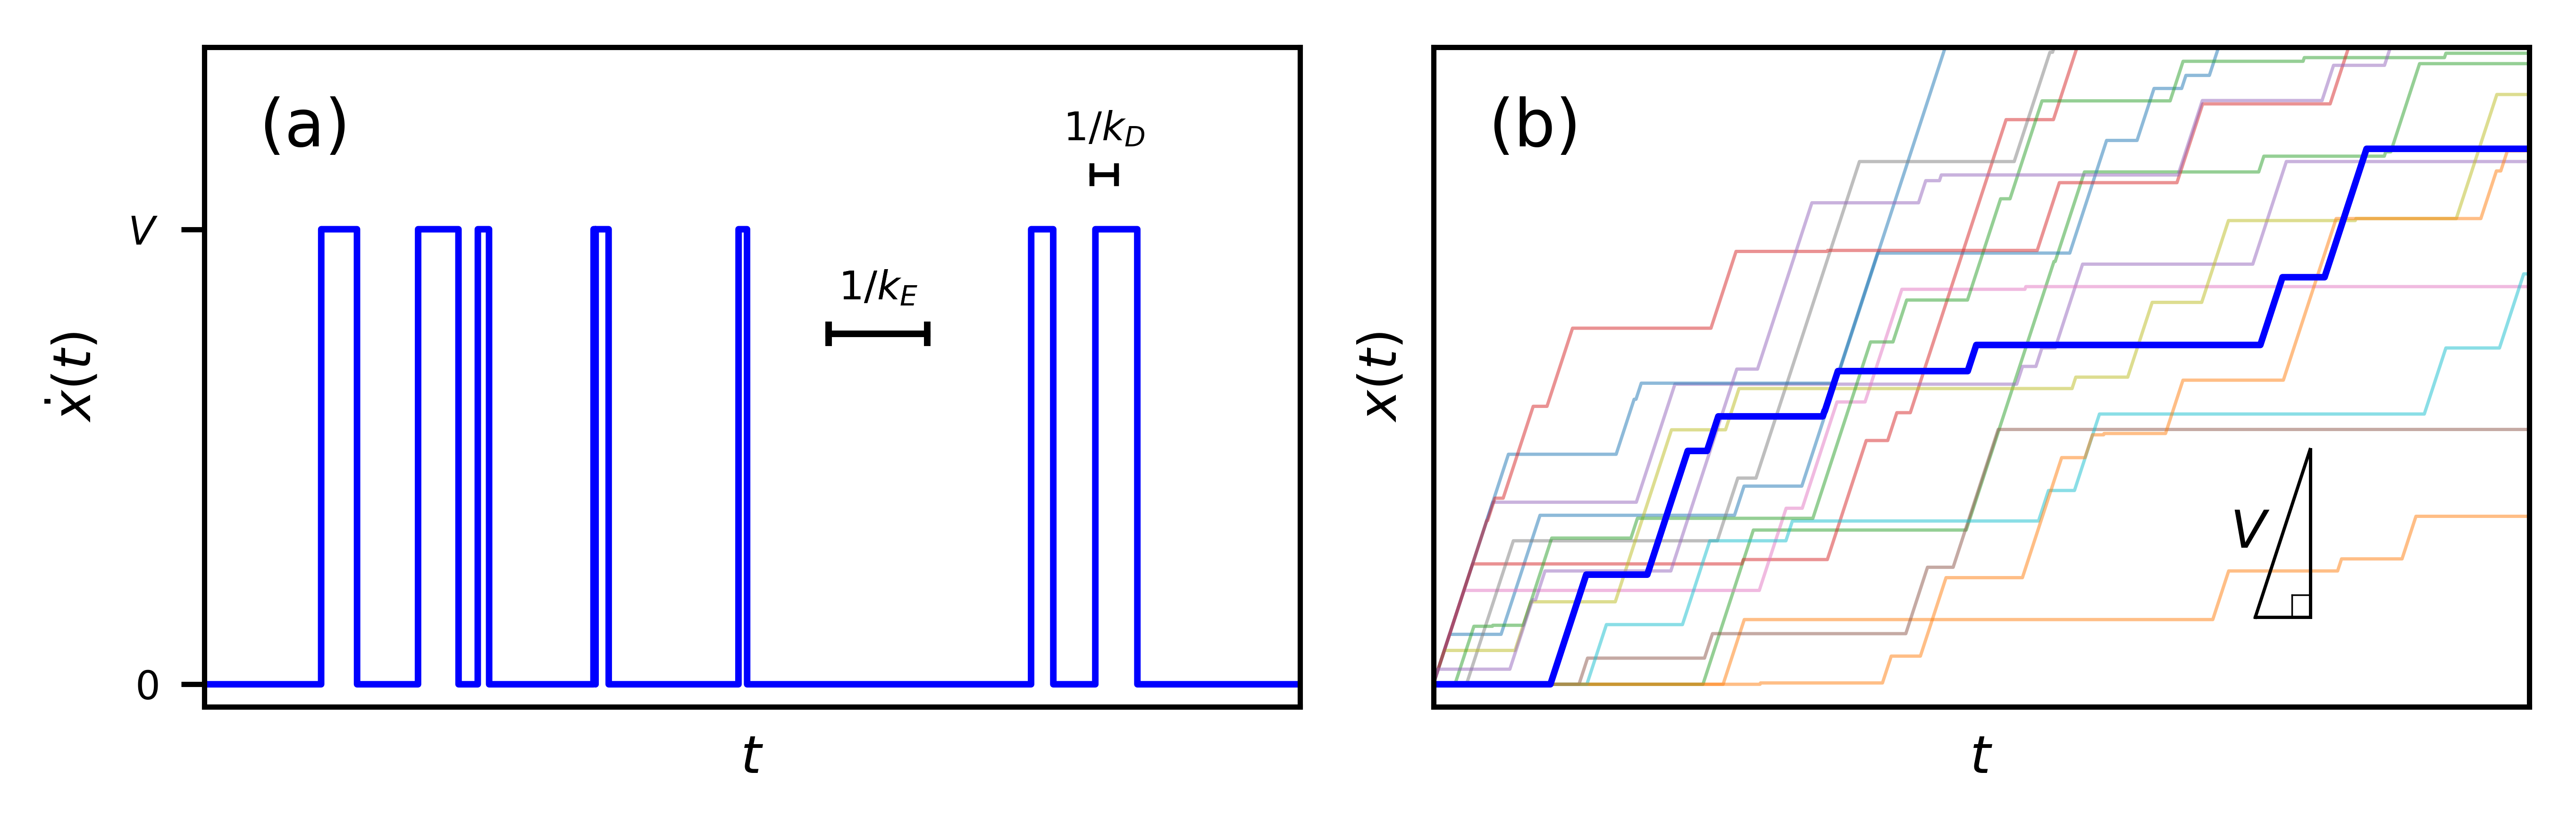

In [157]:
##### xsmol = 4
smol = 6 # the font sizes
med = 8
lar = 10
plt.rc('font',size=med)
plt.rc('axes',titlesize=med)
plt.rc('axes',labelsize=med)
plt.rc('xtick',labelsize=xsmol)
plt.rc('ytick',labelsize=xsmol)
plt.rc('legend',fontsize=med)
plt.rc('figure',titlesize=med)

# initialize the figure
h = 1.8 # height
w = 5.5 # width

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(w,h),dpi=1000,tight_layout=True)
ax1.set_xlabel(r"$t$")
ax1.set_ylabel(r"$\dot{x}(t)$")
ax2.set_xlabel(r"$t$")
ax2.set_ylabel(r"$x(t)$")

tmin=0
tmax=10
ax1.set_xlim(tmin,tmax)
ax2.set_xlim(tmin,tmax)
ymax = 1.4
ymin = -0.05
ax1.set_ylim(ymin,ymax)
ymax2 = 1.9
ymin2 = -ymax2/28
ax2.set_ylim(ymin2,ymax2)

# calculate the telegraph signal...
n = 6 # number of double phases
ke = 1
kd = 4
dt=1e-3
def simul(seed=33,rand=False):
    np.random.seed(seed)
    S = []
    T = []
    s=0
    if rand:
        s = round(np.random.random())
    t=0
    while t<tmax:
        r = np.random.random()
        T.append(t)
        S.append(s)
        if s==0:
            if np.exp(-ke*dt) < r:
                s=1
        else:
            if np.exp(-kd*dt) < r:
                s=0
        t = t + dt
    return np.array(T),np.array(S)
            
t,s = simul()
ax1.plot(t,s,lw=1,color='blue')

ax1.set_yticks([0,1])
ax1.axes.yaxis.set_ticklabels([r"$0$",r"$V$"],fontsize=smol)
ax1.set_xticks([])


# now the trajectories...
ax2.plot(t,s.cumsum()*dt,color='blue',lw=1,zorder=1)


# and add some more...
for i in range(15):
    t,s = simul(seed=i,rand=True)
    ax2.plot(t,s.cumsum()*dt,lw=0.5,alpha=0.5,zorder=-1)
    
    
fx = 0.05
fy = 0.85
ax1.text(fx*tmax,fy*(ymax-ymin)+ymin,'(a)',fontsize=lar)
ax2.text(fx*tmax,fy*(ymax2-ymin2)+ymin2,'(b)',fontsize=lar)

# add in an element indicating typical rest and motion times in panel a


# add in keys on the left panel..
dy = ymax/70
dx = mean
x,y = 5.7,0.55*ymax
ax1.plot([x,x+dx],[y,y],color='black',lw=1)
ax1.plot([x,x],[y-dy,y+dy],color='black',lw=1)
ax1.plot([x+dx,x+dx],[y-dy,y+dy],color='black',lw=1)
ax1.text(x+dx/2,y+5*dy,r"$1/k_E$",ha='center',va='center',fontsize=smol)


keylw=0.75
dy = ymax/70
dx = mean
x,y = 5.7,0.55*ymax
ax1.plot([x,x+dx],[y,y],color='black',lw=keylw)
ax1.plot([x,x],[y-dy,y+dy],color='black',lw=keylw)
ax1.plot([x+dx,x+dx],[y-dy,y+dy],color='black',lw=keylw)
ax1.text(x+dx/2,y+5*dy,r"$1/k_E$",ha='center',va='center',fontsize=smol)


dy = ymax/70
dx = mean/kd
x,y = 8.1,0.8*ymax
ax1.plot([x,x+dx],[y,y],color='black',lw=keylw)
ax1.plot([x,x],[y-dy,y+dy],color='black',lw=keylw)
ax1.plot([x+dx,x+dx],[y-dy,y+dy],color='black',lw=keylw)
ax1.text(x+dx/2,y+5*dy,r"$1/k_D$",ha='center',va='center',fontsize=smol)
# then indicate the velocity in panel b


# 
t = 7.5
dt = tmax/20
x = 0.2
dx = dt
ax2.plot([t,t+dt],[x,x],color='black',lw=0.5)
ax2.plot([t,t+dt],[x,x+dx],color='black',lw=0.5,)
ax2.plot([t+dt,t+dt],[x,x+dx],color='black',lw=0.5)
# now draw a little angle inside the triangle..
dt1 = dt/3
t1 = t+dt-dt1
x1 = x
dx1 = dt1/2.5
ax2.plot([t1,t1],[x1,x1+dx1],lw=0.25,color='black')
ax2.plot([t1,t1+dt1],[x1+dx1,x1+dx1],lw=0.25,color='black')


ax2.text(t-dt/10,x+dx/2,r"$V$",fontsize=med,va='center',ha='center')

ax2.axes.yaxis.set_ticklabels([])
ax2.set_yticks([])
ax2.axes.xaxis.set_ticklabels([])
ax2.set_xticks([])

plt.savefig('lisleConcept.pdf',dpi=1000)

# now produce the figure on the renewal appraoch

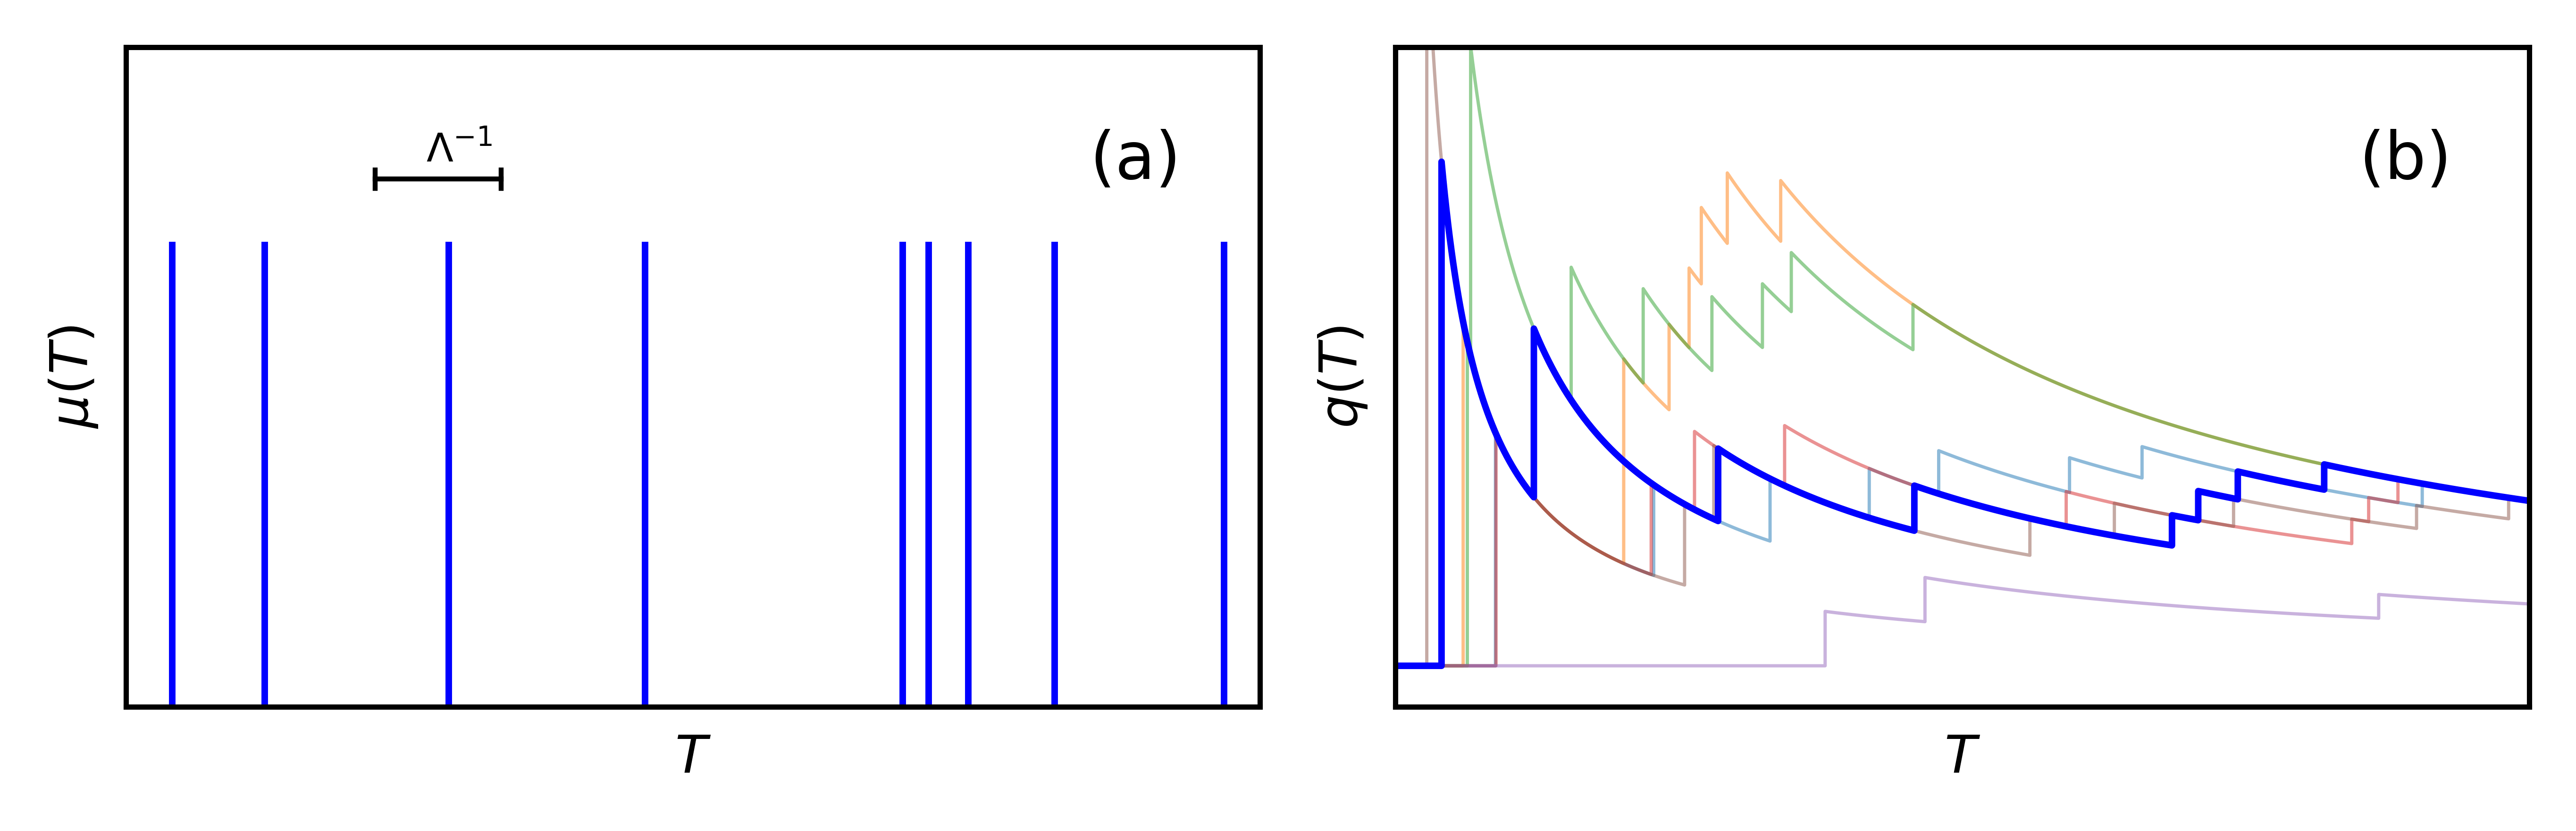

In [5]:
xsmol = 4
smol = 6 # the font sizes
med = 8
lar = 10
plt.rc('font',size=med)
plt.rc('axes',titlesize=med)
plt.rc('axes',labelsize=med)
plt.rc('xtick',labelsize=xsmol)
plt.rc('ytick',labelsize=xsmol)
plt.rc('legend',fontsize=med)
plt.rc('figure',titlesize=med)


# initialize the figure
h = 1.8 # height
w = 5.5 # width

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(w,h),dpi=1000,tight_layout=True)

ax1.set_xlabel(r"$T$")
ax1.set_ylabel(r"$\mu(T)$")
ax2.set_xlabel(r"$T$")
ax2.set_ylabel(r"$q(T)$")


# left panel... make the noise of randomly spaced spikes with height 1 


tmax = 10.0
tmin = 0

n = 9 
rate = n/tmax
np.random.seed(26)
T = np.random.exponential(1/rate,size=n).cumsum()

mumin=0.0
mumax=1.0
ax1.set_xlim(tmin,tmax)
ax1.set_ylim(mumin,mumax)

for ti in T:
    ax1.axvline(ti,ymin=0,ymax=0.7,lw=1,color='blue')

# function to compute the flux
def Q(T):
    dt = 1e-4
    t = 1e-6
    i=0
    O = []
    TO = []
    s = 0 # number of crossings
    while t<tmax:
        TO.append(t)
        O.append(s/t)
        if t>T[i] and i<len(T)-1:
            i+=1
            s+=1
        t = t + dt
    return TO,O

# now plot the right panel 
t,q = Q(T)
ax2.plot(t,q,lw=1,color='blue')            
ax2.set_xlim(tmin,tmax)

# and add in others...
for seed in range(6):
    np.random.seed(seed)
    T = np.random.exponential(1/rate,size=n).cumsum()
    t,q = Q(T)
    ax2.plot(t,q,lw=0.5,alpha=0.5,zorder=-1)
    
qmax = 3
qmin = -0.2
ax2.set_ylim(qmin,qmax)


# add in the panel indicators
fx = 0.85
fy = 0.8
ax1.text(fx*tmax,fy*1.0,'(a)',fontsize=lar)
ax2.text(fx*tmax,fy*(qmax-qmin)+qmin,'(b)',fontsize=lar)

# add in a panel indicator a for the rate constant meaning
dmu = 1/70
dt = 1/rate
mu= 0.8
t = 2.2
keylw = 0.75

ax1.plot([t, t+dt],[mu, mu],color='black',lw=keylw)
ax1.plot([t, t],[mu-dmu, mu+dmu],color='black',lw=keylw)
ax1.plot([t+dt, t+dt],[mu-dmu, mu+dmu],color='black',lw=keylw)
ax1.text(t+dt/2+dt/6,mu+3*dmu,r"$\Lambda^{-1}$",ha='center',va='center',fontsize=smol)



# turn off axis ticks...
ax1.axes.yaxis.set_ticklabels([])
ax1.set_yticks([])
ax1.axes.xaxis.set_ticklabels([])
ax1.set_xticks([])
ax2.axes.yaxis.set_ticklabels([])
ax2.set_yticks([])
ax2.axes.xaxis.set_ticklabels([])
ax2.set_xticks([])

plt.savefig('anceyRenewal.pdf',dpi=1000)